In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing



In [2]:
# ---
# Mean/Median Imputation for Outliers
# ---
#
# When to use it:
# This technique is a simple way to handle outliers by replacing them with a measure of central tendency.
# It's best used when you believe the outliers are due to data entry errors or are not representative
# of the actual phenomenon you are modeling, and you want to retain the sample size.
#
# - Median Imputation (used here): Best for skewed distributions as it's less affected by outliers.
# - Mean Imputation: Suitable for data that is approximately normally distributed. you can do mean by changing median to mean in #5
# - Mode Imputation: Generally used for categorical features.
#
# Requirements:
# - The data must be numerical to calculate mean or median.
# - You need a clear, justifiable method for identifying which values are outliers.
#   Here, we use the Interquartile Range (IQR) method.
# ---




In [3]:
# 1. Load a sample dataset
# We'll use the California Housing dataset from scikit-learn.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target # Add the target variable as well

print("Original DataFrame head:")
print(df.head())
print("\n" + "="*50 + "\n")




Original DataFrame head:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  




In [4]:
# 2. Select a feature to work with
# We will focus on the 'MedInc' (Median Income) feature, which can have high-value outliers.
feature_name = 'MedInc'
print(f"Working with the '{feature_name}' feature.\n")
print("Description of the original feature:")
print(df[feature_name].describe())
print("\n" + "="*50 + "\n")




Working with the 'MedInc' feature.

Description of the original feature:
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64




In [5]:
# 3. Identify outliers using the IQR method
# The IQR method identifies outliers as any values that fall below Q1 - 1.5*IQR
# or above Q3 + 1.5*IQR.
Q1 = df[feature_name].quantile(0.25)
Q3 = df[feature_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Identified Outlier Boundaries for '{feature_name}':")
print(f"Lower Bound: {lower_bound:.4f}")
print(f"Upper Bound: {upper_bound:.4f}")
print("\n" + "="*50 + "\n")

# Create a boolean mask for the outliers
outlier_mask = (df[feature_name] < lower_bound) | (df[feature_name] > upper_bound)



Identified Outlier Boundaries for 'MedInc':
Lower Bound: -0.7064
Upper Bound: 8.0130




In [6]:
# 4. Create a new DataFrame containing only the outliers
# This helps in inspecting the outliers separately. We add an 'Outlier_Score'
# which in this case is just the original value, but for other methods could be a calculated score.
outliers_df = df[outlier_mask].copy()
outliers_df['Outlier_Score'] = outliers_df[feature_name]

print(f"Found {len(outliers_df)} outliers in the '{feature_name}' feature.")
print("Head of the outliers DataFrame:")
print(outliers_df.head())
print("\n" + "="*50 + "\n")




Found 681 outliers in the 'MedInc' feature.
Head of the outliers DataFrame:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1     8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131  11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134   8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135   8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   

     Longitude  MedHouseVal  Outlier_Score  
0      -122.23        4.526         8.3252  
1      -122.22        3.585         8.3014  
131    -122.19        3.926        11.6017  
134    -122.19        3.352         8.2049  
135    -122.20        3.512         8.4010  




In [7]:
# 5. Apply Median Imputation to the selected data
# We create a new column to store the data with imputed outliers.
# This preserves the original data for comparison.
df_imputed = df.copy()
feature_imputed_name = f'{feature_name}_imputed'

# Calculate the median of the feature *before* changing it
median_value = df_imputed[feature_name].median()
print(f"The median of '{feature_name}' is: {median_value:.4f}")

# Replace the outliers with the median
df_imputed[feature_imputed_name] = df_imputed[feature_name].where(~outlier_mask, median_value)

print(f"Created new column '{feature_imputed_name}' with outliers replaced by the median.")
print("\n" + "="*50 + "\n")




The median of 'MedInc' is: 3.5348
Created new column 'MedInc_imputed' with outliers replaced by the median.




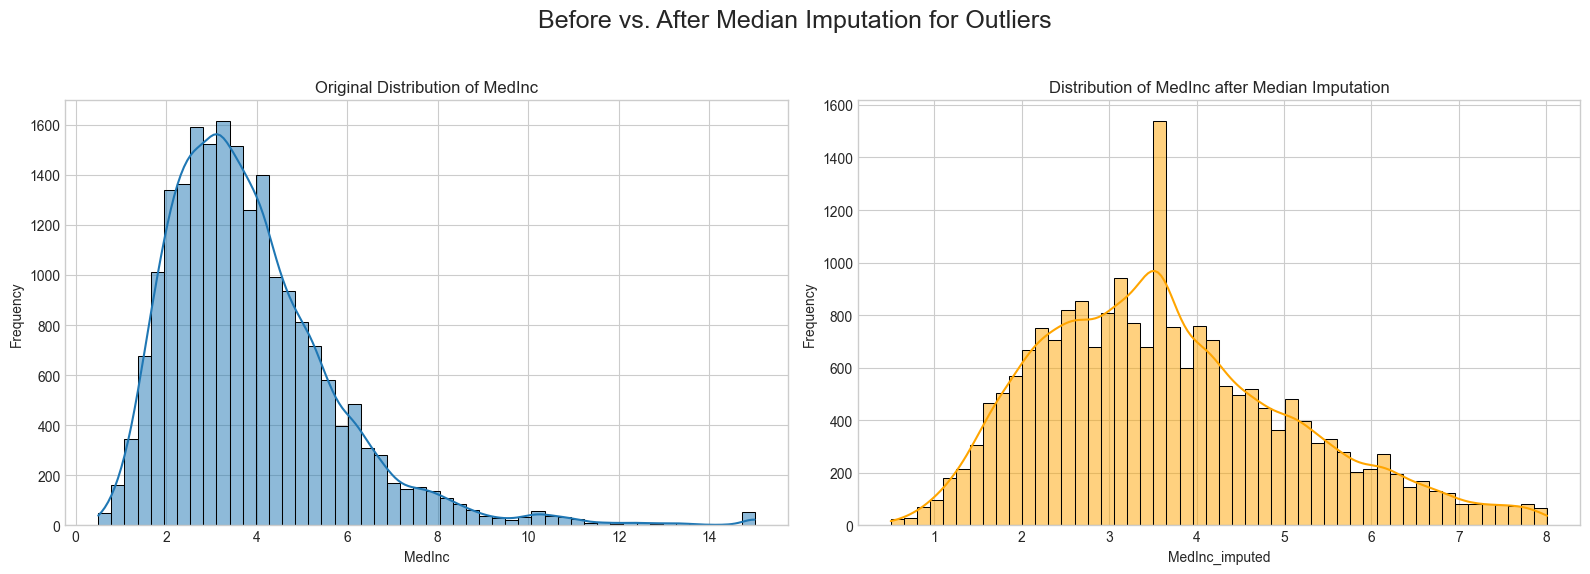

In [8]:
# 6. Show the result of applying the technique
# We'll create a before-and-after visualization to see the effect.

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before: Original data distribution
sns.histplot(df[feature_name], bins=50, kde=True, ax=axes[0])
axes[0].set_title(f'Original Distribution of {feature_name}')
axes[0].set_xlabel(feature_name)
axes[0].set_ylabel('Frequency')

# After: Imputed data distribution
sns.histplot(df_imputed[feature_imputed_name], bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title(f'Distribution of {feature_name} after Median Imputation')
axes[1].set_xlabel(feature_imputed_name)
axes[1].set_ylabel('Frequency')

plt.suptitle('Before vs. After Median Imputation for Outliers', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




In [9]:
# 7. Print the head of the resulting DataFrame
# We'll show the original column, the new imputed column, and the outlier mask for comparison.
print("Head of the final DataFrame with original and imputed columns:")
result_df = df_imputed[[feature_name, feature_imputed_name]].copy()
result_df['Is_Outlier'] = outlier_mask
print(result_df.head(10))

# Display a row that was identified as an outlier to see the change
print("\nExample of an imputed outlier row:")
print(result_df[result_df['Is_Outlier']].head())

Head of the final DataFrame with original and imputed columns:
   MedInc  MedInc_imputed  Is_Outlier
0  8.3252          3.5348        True
1  8.3014          3.5348        True
2  7.2574          7.2574       False
3  5.6431          5.6431       False
4  3.8462          3.8462       False
5  4.0368          4.0368       False
6  3.6591          3.6591       False
7  3.1200          3.1200       False
8  2.0804          2.0804       False
9  3.6912          3.6912       False

Example of an imputed outlier row:
      MedInc  MedInc_imputed  Is_Outlier
0     8.3252          3.5348        True
1     8.3014          3.5348        True
131  11.6017          3.5348        True
134   8.2049          3.5348        True
135   8.4010          3.5348        True
